The credits for code and data in this notebook belong to Julia Evans, author of this [post](https://jvns.ca/blog/2017/11/12/binder--an-awesome-tool-for-hosting-jupyter-notebooks/)

The workshop follows Data Carpentry outline for beginner's Python for (Social Sciences)[https://github.com/jvns/pandas-cookbook]

Now when we have our data-reading libraries (pandas) we can read in a comma-separated file. This is some cyclist data and bike routs in Montreal, CA. (Here)[http://donnees.ville.montreal.qc.ca/dataset/velos-comptage] is the original dataset (in French).

In [22]:
# Render our plots inline
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

/Users/elizabethpermina/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [23]:
broken_df = pd.read_csv('data/bikes.csv')

In [24]:
broken_df[:3]

,Date;Berri 1;Brébeuf (données non disponibles);Côte-Sainte-Catherine;Maisonneuve 1;Maisonneuve 2;du Parc;Pierre-Dupuy;Rachel1;St-Urbain (données non disponibles)
0,01/01/2012;35;;0;38;51;26;10;16;
1,02/01/2012;83;;1;68;153;53;6;43;
2,03/01/2012;135;;2;104;248;89;3;58;


3 rows × 1 columns

You'll notice that this is totally broken! read_csv has a bunch of options that will let us fix that, though. Here we'll

change the column separator to a ;
Set the encoding to 'latin1' (the default is 'utf8')
Parse the dates in the 'Date' column
Tell it that our dates have the day first instead of the month first
Set the index to be the 'Date' column

In [25]:
fixed_df = pd.read_csv('data/bikes.csv', sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')
fixed_df[:3]

,Berri 1,BrÃ©beuf (donnÃ©es non disponibles),CÃ´te-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (donnÃ©es non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN


## 1.3 Plotting a column
Just add .plot() to the end! How could it be easier? =)

We can see that, unsurprisingly, not many people are biking in January, February, and March,

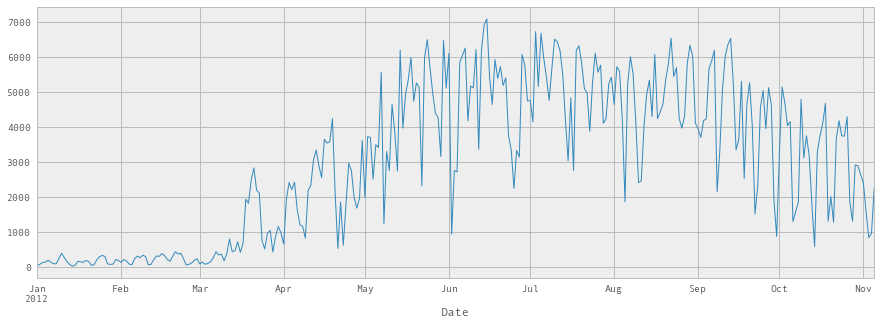

In [26]:
fixed_df['Berri 1'].plot()

We can also plot all the columns just as easily. We'll make it a little bigger, too. You can see that it's more squished together, but all the bike paths behave basically the same -- if it's a bad day for cyclists, it's a bad day everywhere.

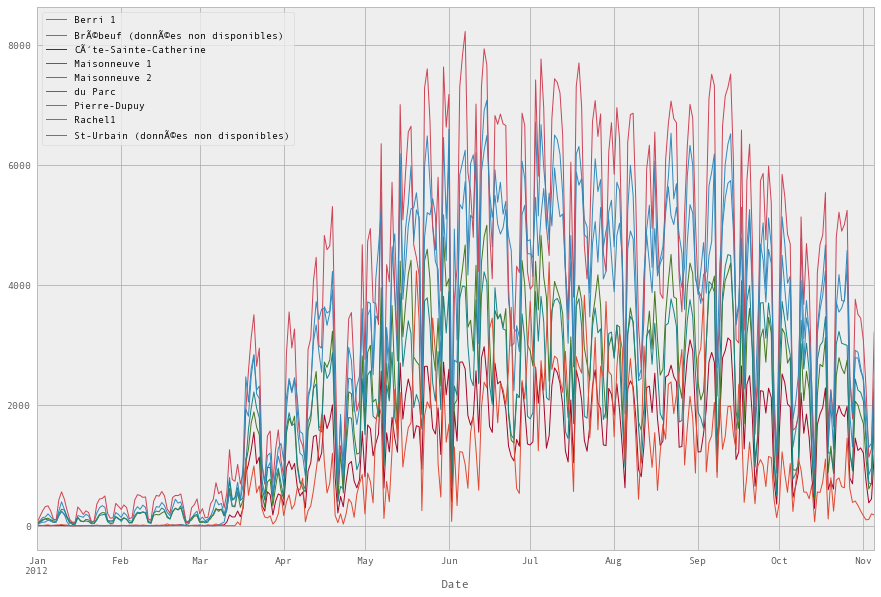

In [27]:
fixed_df.plot(figsize=(15, 10))

## 1.4 Putting all that together¶
Here's the code we needed to write do draw that graph, all together:

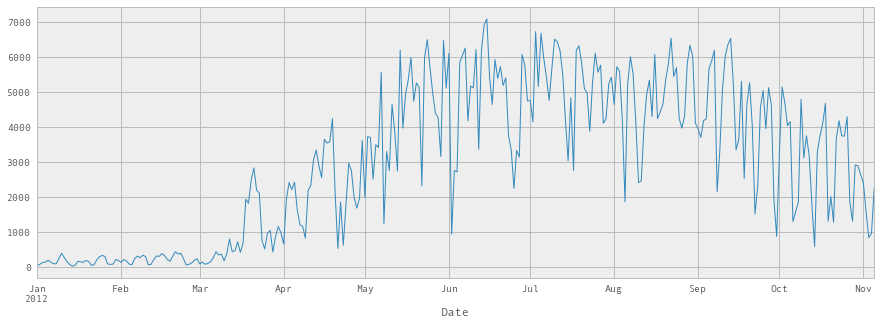

In [29]:
df = pd.read_csv('data/bikes.csv', sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')
df['Berri 1'].plot()